In [3]:
visitors_to_A = 1300
visitors_to_B = 1275

conversions_from_A = 120
conversions_from_B = 125

# AとBのコンバージョンの確率のモデリング

* 事前分布はベータ分布
 * 値が0から1まで制限されていて、確率が取る範囲と同じため
* 訪問者とコンバージョンデータは二項分布に従う
 * 1300回中120回の成功とする

* 事前分布が$Beta(\alpha_0,\beta_0)$で$N$回中$X$回の成功を観測
 * 事後分布 => $Beta(\alpha_0 + X,\beta_0 + N - X)$


In [4]:
# scipyのbetaを使えば事後分布からサンプリングできる！

from scipy.stats import beta

# 事前分布をBeta(1,1)と仮定
alpha_prior = 1
beta_prior = 1

posterior_A = beta(alpha_prior + conversions_from_A, beta_prior + visitors_to_A - conversions_from_A)
posterior_B = beta(alpha_prior + conversions_from_B, beta_prior + visitors_to_B - conversions_from_B)

In [6]:
# Aの事後分布のサンプルがBの事後分布からのサンプルよりもおおきくなる確率を比較
# rvsメソッドを使ってサンプリング

samples = 20000 #サンプル数を大きくして近似制度を上げたい
samples_posterior_A =  posterior_A.rvs(samples)
samples_posterior_B =  posterior_B.rvs(samples)

print((samples_posterior_A > samples_posterior_B).mean())

0.31105


サイトAがサイトBよりもコンバージョンが高い確率↑

pdfメソッドをつかえば、事後分布を可視化できる

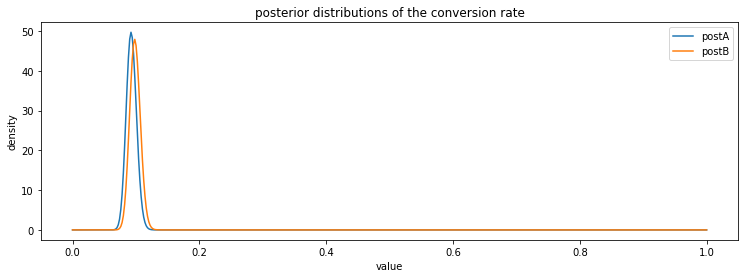

In [9]:
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
figsize(12.5, 4)

x = np.linspace(0, 1, 500)
plt.plot(x, posterior_A.pdf(x), label = 'postA')
plt.plot(x, posterior_B.pdf(x), label = 'postB')

plt.xlabel('value')
plt.ylabel('density')
plt.title('posterior distributions of the conversion rate')
plt.legend()